### О ЛР:

- Coding Gradient boosting

----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку (Она тут равняется 6).

**Оценка**:

***DeadLine - 28.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.

In [44]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style="darkgrid")
filterwarnings("ignore")

In [45]:
x = load_npz("x.npz")
y = np.load("y.npy")

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 666 для воспроизводимости).

In [46]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=666
)

x_test, x_valid, y_test, y_valid = train_test_split(
    x_test, y_test, test_size=0.5, random_state=666
)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга [2 балла]

Необходимо дописать код в файле `boosting.py`. Уже создан шаблон класса `Boosting`, который можно модифицировать по своему усмотрению.

### Описание функций:

#### `__init__`

Конструктор класса принимает следующие параметры:

- `base_model_class` — класс базовой модели для бустинга.
- `base_model_params` — словарь гиперпараметров для базовой модели.
- `n_estimators` — количество базовых моделей для обучения.
- `learning_rate` — темп обучения, должен быть в диапазоне (0, 1].
- `subsample` — доля обучающей выборки для тренировки базовой модели (размер бутстрап-выборки относительно исходной).
- `early_stopping_rounds` — число итераций без улучшения на валидационной выборке, после которых обучение прекращается.
- `plot` — флаг для построения графика качества моделей после обучения.

#### `fit`

Метод `fit` принимает обучающую и валидационную выборки.

1. Инициализируем нулевую модель и делаем предсказания (например, все нули) для обеих выборок.
2. Обучаем `n_estimators` базовых моделей:
   - Обучаем новую базовую модель на текущих остатках.
   - Обновляем предсказания на обучающей и валидационной выборках.
   - Рассчитываем ошибки на обеих выборках с помощью `loss_fn`.
   - Проверяем условия для ранней остановки.

3. Если флаг `plot` установлен, строим график качества после обучения всех моделей.

#### `fit_new_base_model`

Метод `fit_new_base_model` принимает обучающую выборку и текущие предсказания для неё.

1. Генерируем бутстрап-выборку.
2. Обучаем базовую модель на этой выборке.
3. Оптимизируем значение гаммы.
4. Добавляем новую базовую модель и гамму в соответствующие списки (учитывая `learning_rate`).

#### `predict_proba`

Метод `predict_proba` принимает выборку для предсказания вероятностей.

1. Суммируем предсказания базовых моделей (учитывая гамму и `learning_rate`).
2. Применяем сигмоидальную функцию для получения вероятностей.

In [47]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [49]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 881 ms, sys: 2 ms, total: 883 ms
Wall time: 883 ms
Train ROC-AUC 0.9671
Valid ROC-AUC 0.9419
Test ROC-AUC 0.9440


## Задание 2. Обучение градиентного бустинга [0.5 балла]

Оцените качество вашей реализации градиентного бустинга на тестовой выборке, используя базовые модели — решающие деревья с различной максимальной глубиной. Метрикой будет ROC-AUC.

**Инструкция:**
1. Перебирайте значения максимальной глубины деревьев от 1 до 30 с шагом 2.
2. Оставьте остальные параметры бустинга по умолчанию.
3. Постройте график зависимости качества на обучающей и тестовой выборке от максимальной глубины деревьев.

In [ ]:
results = {}

depths = range(1, 30, 2)

### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

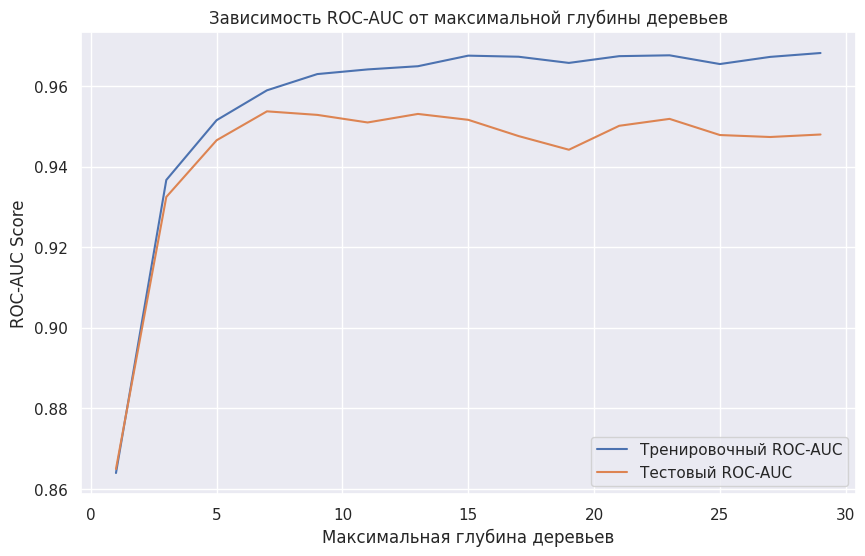

    train_roc_auc  test_roc_auc
1        0.863960      0.864961
3        0.936713      0.932499
5        0.951561      0.946577
7        0.958973      0.953754
9        0.963007      0.952876
11       0.964163      0.950993
13       0.964957      0.953111
15       0.967583      0.951651
17       0.967314      0.947616
19       0.965779      0.944224
21       0.967457      0.950169
23       0.967667      0.951885
25       0.965497      0.947873
27       0.967276      0.947384
29       0.968237      0.948006


In [53]:
import numpy as np
import pandas as pd

results = {}
depths = range(1, 30, 2)

for depth in depths:
    boosting = Boosting(base_model_params={'max_depth': depth},)

    boosting.fit(x_train, y_train, x_valid, y_valid)

    train_roc_auc = boosting.score(x_train, y_train)
    test_roc_auc = boosting.score(x_test, y_test)

    results[depth] = {
        'train_roc_auc': train_roc_auc,
        'test_roc_auc': test_roc_auc
    }

train_scores = [results[depth]['train_roc_auc'] for depth in depths]
test_scores = [results[depth]['test_roc_auc'] for depth in depths]

plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label='Тренировочный ROC-AUC')
plt.plot(depths, test_scores, label='Тестовый ROC-AUC')
plt.xlabel('Максимальная глубина деревьев')
plt.ylabel('ROC-AUC Score')
plt.title('Зависимость ROC-AUC от максимальной глубины деревьев')
plt.legend()
plt.grid(True)
plt.show()

results_df = pd.DataFrame(results).T
print(results_df)

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

In [54]:
max(test_scores)

0.95375437976481

Лучшее качество модели на глубине дерева 7 = 0.95375437976481. При увеличении глубины деревьев тренировочная выборка начинает переобучаться, а тестовая соответственно начинает снижаться либо оставаться в определенных пределах

## Задание 3. Подбор гиперпараметров и поиск оптимальной модели [3 балла]

Настройте основные гиперпараметры вашей модели градиентного бустинга, используя валидационную выборку. Подберите параметры как для самого бустинга, так и для базовых моделей.

**Рекомендации:**
- Используйте библиотеки для автоматизированного подбора гиперпараметров, такие как [Hyperopt](https://github.com/hyperopt/hyperopt) или [Optuna](https://optuna.org/).
- Подберите все основные параметры, чтобы найти лучшую модель на валидационной выборке.

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

In [55]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.5 MB/s eta 0:00:00


In [58]:
import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 30)
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    subsample = trial.suggest_uniform('subsample', 0.5, 1.0)

    boosting = Boosting(
        base_model_params={'max_depth': max_depth},
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        subsample=subsample,
    )

    boosting.fit(x_train, y_train, x_valid, y_valid)
    valid_roc_auc = boosting.score(x_valid, y_valid)

    return valid_roc_auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


best_trial = study.best_trial
print('Best ROC-AUC:', best_trial.value)
print('Best hyperparameters:', best_trial.params)

# Вывод лучших параметров
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params:")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-08-28 18:05:18,245] A new study created in memory with name: no-name-a73ed59f-589a-42d9-b249-2b659cbbb0aa
[I 2024-08-28 18:05:40,972] Trial 0 finished with value: 0.9567310661953948 and parameters: {'max_depth': 18, 'n_estimators': 52, 'learning_rate': 0.02215944613813772, 'subsample': 0.9121311873909529}. Best is trial 0 with value: 0.9567310661953948.
[I 2024-08-28 18:06:03,768] Trial 1 finished with value: 0.9622006413262718 and parameters: {'max_depth': 11, 'n_estimators': 81, 'learning_rate': 0.11586027766667455, 'subsample': 0.8611219125303148}. Best is trial 1 with value: 0.9622006413262718.
[I 2024-08-28 18:08:36,948] Trial 2 finished with value: 0.9519241694596007 and parameters: {'max_depth': 28, 'n_estimators': 250, 'learning_rate': 0.09037014073472027, 'subsample': 0.8882469042123383}. Best is trial 1 with value: 0.9622006413262718.
[I 2024-08-28 18:09:15,953] Trial 3 finished with value: 0.9622688918629346 and parameters: {'max_depth': 10, 'n_estimators': 211, 'lea

Best ROC-AUC: 0.9630722654984005
Best hyperparameters: {'max_depth': 12, 'n_estimators': 224, 'learning_rate': 0.13545884159452043, 'subsample': 0.6494642503966196}
Best trial:
  Value: 0.9630722654984005
  Params:
    max_depth: 12
    n_estimators: 224
    learning_rate: 0.13545884159452043
    subsample: 0.6494642503966196


Early stopping after 44 estimators


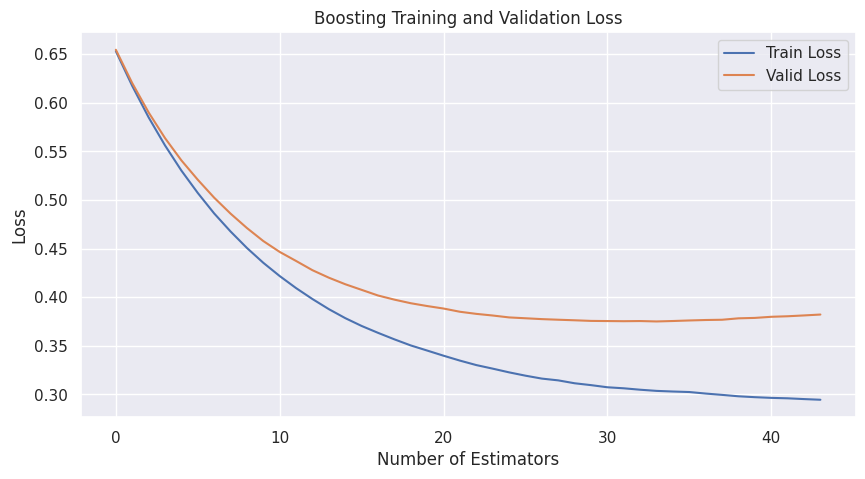

Test ROC-AUC: 0.9592


In [63]:
best_params = best_trial.params
boosting = Boosting(
    base_model_params={'max_depth': best_params['max_depth']},
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    early_stopping_rounds=10,
    plot=True
)
boosting.fit(x_train, y_train, x_valid, y_valid)

test_roc_auc = boosting.score(x_test, y_test)
print(f'Test ROC-AUC: {test_roc_auc:.4f}')

## Задание 4. Интерпретация градиентного бустинга [1 балл]

Постройте калибровочную кривую для вашей лучшей модели градиентного бустинга и оцените, насколько точно модель предсказывает вероятности.

**Инструкция:**
1. Постройте калибровочную кривую для лучшей модели градиентного бустинга.
2. Постройте аналогичную кривую для логистической регрессии.
3. Сравните полученные результаты и проанализируйте, насколько хорошо каждая модель оценивает вероятности.

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

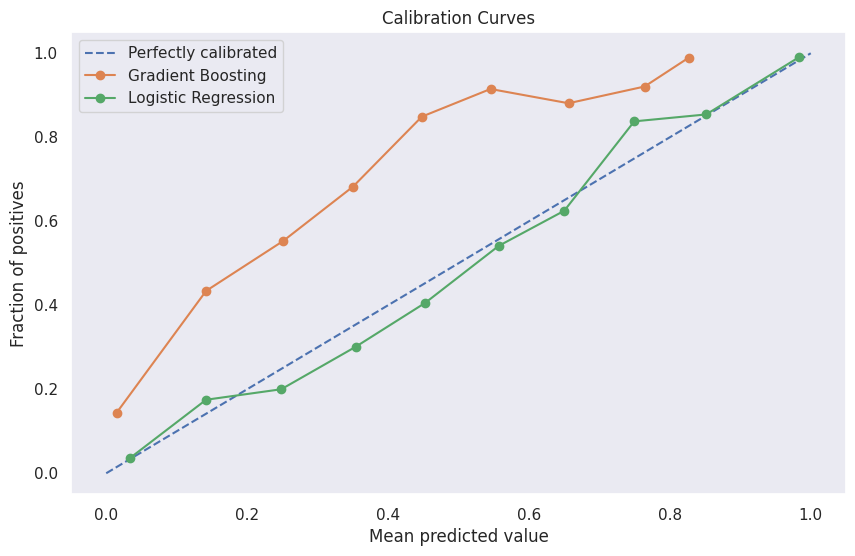

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve

# Обучение логистической регрессии
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)

# Получение предсказанных вероятностей
gb_probs = boosting.predict_proba(x_test)[:, 1]
logistic_probs = logistic_model.predict_proba(x_test)[:, 1]

# Функция для построения калибровочной кривой
def plot_calibration_curve(y_true, probs, label):
    fraction_of_positives, mean_predicted_value = calibration_curve(y_true, probs, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label=label)

# Построение графика калибровочных кривых
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')

plot_calibration_curve(y_test, gb_probs, 'Gradient Boosting')
plot_calibration_curve(y_test, logistic_probs, 'Logistic Regression')

plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curves')
plt.legend()
plt.grid()
plt.show()

Теперь оценим важность признаков для градиентного бустинга.

**Задание:**
1. Поскольку базовая модель — дерево из `sklearn`, вычислите важность каждого признака для каждого дерева, используя атрибут `feature_importances_` у `DecisionTreeRegressor`.
2. Усредните значения важности по всем деревьям и нормализуйте их так, чтобы сумма была равна единице (убедитесь, что значения неотрицательны).
3. Дополните вашу реализацию бустинга, добавив метод `feature_importances_`, который будет возвращать усредненные и нормализованные важности признаков.

**Построение графиков:**
1. Постройте столбчатую диаграмму важности признаков для градиентного бустинга.
2. На соседнем графике изобразите важность признаков для логистической регрессии, используя модули весов.
3. Сравните графики и проанализируйте полученные результаты.

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

In [73]:
feature_names = x.columns if hasattr(x, 'columns') else [f'Feature {i}' for i in range(x.shape[1])]

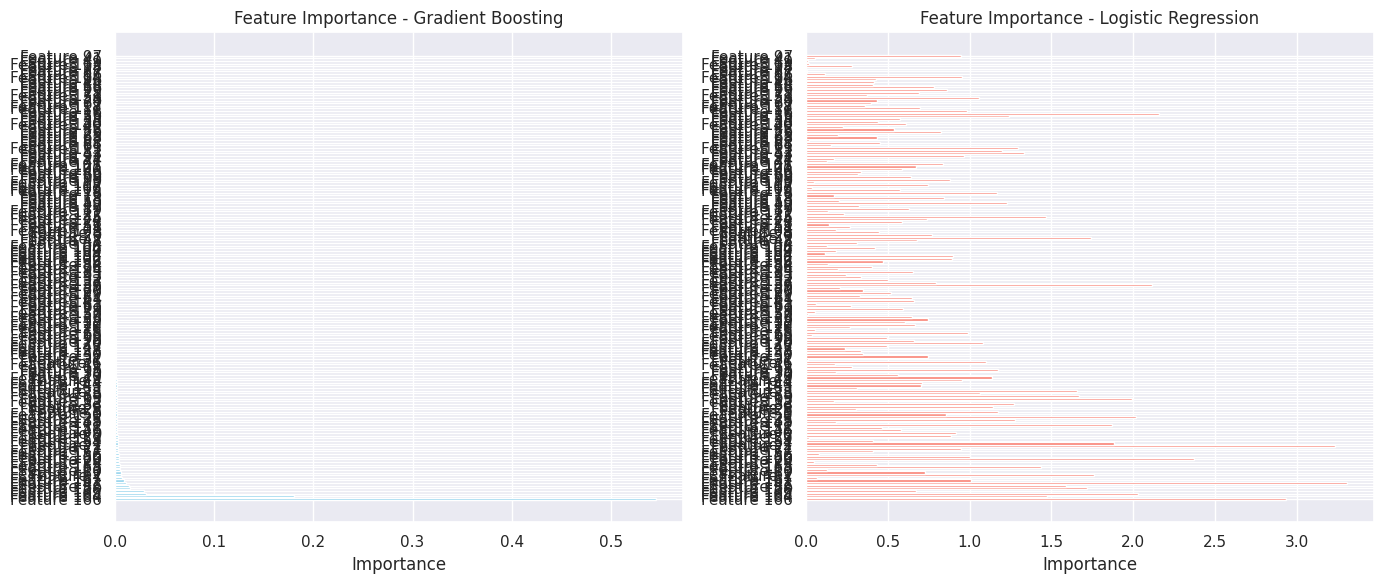

In [75]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)

# Получение важности признаков для градиентного бустинга
gb_importances = boosting.feature_importances_

# Получение весов для логистической регрессии
logistic_importances = np.abs(logistic_model.coef_[0])

# Создание DataFrame для удобства визуализации
feature_names = x.columns if hasattr(x, 'columns') else [f'Feature {i}' for i in range(x.shape[1])]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'GB Importance': gb_importances,
    'Logistic Importance': logistic_importances
})

# Сортировка по важности признаков
importance_df = importance_df.sort_values(by='GB Importance', ascending=False)

# Построение графиков важности признаков
plt.figure(figsize=(14, 6))

# График для градиентного бустинга
plt.subplot(1, 2, 1)
plt.barh(importance_df['Feature'], importance_df['GB Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Gradient Boosting')

# График для логистической регрессии
plt.subplot(1, 2, 2)
plt.barh(importance_df['Feature'], importance_df['Logistic Importance'], color='salmon')
plt.xlabel('Importance')
plt.title('Feature Importance - Logistic Regression')

plt.tight_layout()
plt.show()

Получилась каша выведем обобщенно

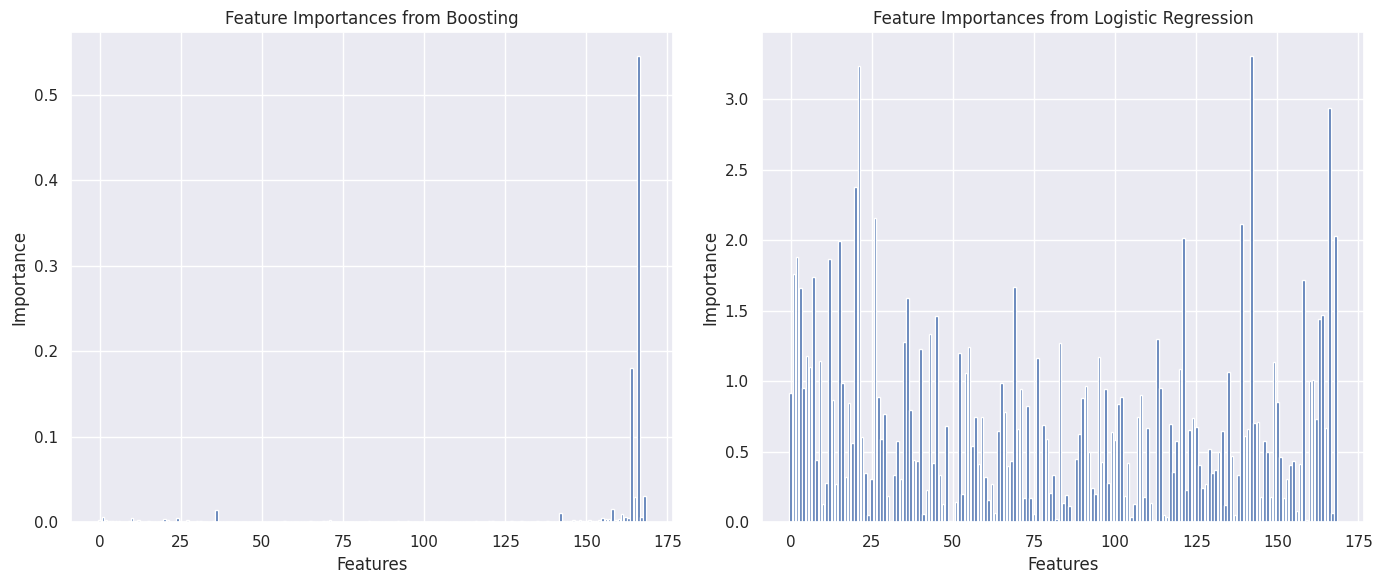

In [70]:
# Train the logistic regression model
logistic = LogisticRegression(max_iter=1000)
logistic.fit(x_train, y_train)

# Get feature importances from logistic regression
logistic_importances = np.abs(logistic.coef_[0])

# Get feature importances from boosting
boosting_importances = boosting.feature_importances_

# Plotting feature importances
features = range(len(boosting_importances))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(features, boosting_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Boosting')

plt.subplot(1, 2, 2)
plt.bar(features, logistic_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Logistic Regression')

plt.tight_layout()
plt.show()

Обычно избыточные признаки могут негативно влиять на качество бустинга. Попробуйте следующее:

1. **Отфильтруйте неважные признаки:** Используйте построенную диаграмму важности признаков, чтобы отобрать наиболее незначительные признаки.
2. **Обучите модель повторно:** Обучите модель на основе оставшихся признаков с теми же гиперпараметрами.
3. **Оцените качество модели:** Сравните результаты новой модели с исходной. Улучшилось ли качество после отфильтровывания незначительных признаков?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Original Test ROC-AUC: 0.9592
Filtered Test ROC-AUC: 0.9392


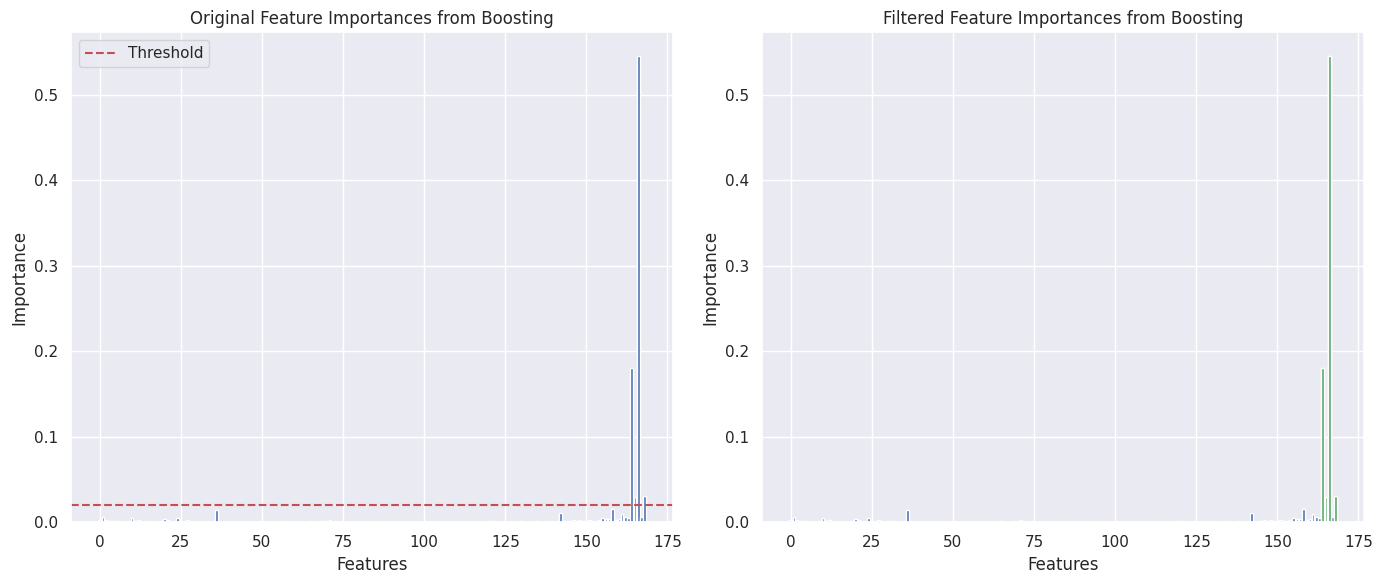

In [83]:
# устанавливаем пороговое значение
threshold = 0.02

# важность признаков бустинга
boosting_importances = boosting.feature_importances_

# фичи важнее порогового значения
significant_features = np.where(boosting_importances > threshold)[0]

# отфильтрованные данные
x_train_filtered = x_train[:, significant_features]
x_valid_filtered = x_valid[:, significant_features]
x_test_filtered = x_test[:, significant_features]

# обучение на отфильтрованных данных
boosting_filtered = Boosting(
    base_model_params={'max_depth': best_params['max_depth']},
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
)
boosting_filtered.fit(x_train_filtered, y_train, x_valid_filtered, y_valid)

# оценка новой модели
train_roc_auc_filtered = boosting_filtered.score(x_train_filtered, y_train)
valid_roc_auc_filtered = boosting_filtered.score(x_valid_filtered, y_valid)
test_roc_auc_filtered = boosting_filtered.score(x_test_filtered, y_test)

print(f'Original Test ROC-AUC: {boosting.score(x_test, y_test):.4f}')
print(f'Filtered Test ROC-AUC: {test_roc_auc_filtered:.4f}')

features = range(len(boosting_importances))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(features, boosting_importances)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Original Feature Importances from Boosting')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(features, boosting_importances)
plt.bar(significant_features, boosting_importances[significant_features], color='g')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Filtered Feature Importances from Boosting')
plt.tight_layout()
plt.show()

Отфильтрованный бустинг оказался даже немного хуже, видимо малозначимые признаки как-то влияют на результат

## Задание 5 (бонус). Блендинговое [0.5 балла]

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

In [88]:
from sklearn.metrics import roc_auc_score

boosting = Boosting(
    base_model_params={'max_depth': best_params['max_depth']},
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    early_stopping_rounds=10,
    plot=False
)
boosting.fit(x_train, y_train, x_valid, y_valid)

# Обучение логистической регрессии
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

# Получаем предсказания на валидационной выборке
gb_pred = boosting.predict_proba(x_valid)[:, 1]  # Вероятности для класса 1
lr_pred = lr_model.predict_proba(x_valid)[:, 1]  # Вероятности для класса 1

# Создаем новый набор признаков для мета-модели
blending_features = np.vstack((gb_pred, lr_pred)).T

# Обучаем мета-модель (логистическую регрессию)
meta_model = LogisticRegression(max_iter=1000)
meta_model.fit(blending_features, y_valid)

# Получаем предсказания мета-модели на тестовой выборке
gb_test_pred = boosting.predict_proba(x_test)[:, 1]
lr_test_pred = lr_model.predict_proba(x_test)[:, 1]
blending_test_features = np.vstack((gb_test_pred, lr_test_pred)).T

y_pred_meta = meta_model.predict(blending_test_features)

# Оценка качества мета-модели
accuracy_meta = roc_auc_score(y_test, y_pred_meta)

print(f"Accuracy of blended model: {accuracy_meta:.4f}")

accuracy_gb = boosting.score(x_test, y_test)

accuracy_lr = roc_auc_score(y_test, lr_test_pred)

print(f"Accuracy of Gradient Boosting: {accuracy_gb:.4f}")
print(f"Accuracy of Logistic Regression: {accuracy_lr:.4f}")


Early stopping after 40 estimators
Accuracy of blended model: 0.9024
Accuracy of Gradient Boosting: 0.9578
Accuracy of Logistic Regression: 0.9622


Есть небольшое улучшение с импользованием блендинга

## Задание 6 (бонус). Катбустовое [0.5 балла]

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

In [90]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.0 MB/s eta 0:00:00


Best hyperparameters: {'max_depth': 12, 'n_estimators': 224, 'learning_rate': 0.13545884159452043, 'subsample': 0.6494642503966196}

In [91]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

# инициализация параметров
catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.13,
    depth=12,
    eval_metric='AUC',
    random_seed=42,
    early_stopping_rounds=10,
    verbose=100
)

# обучение
catboost_model.fit(x_train, y_train, eval_set=(x_valid, y_valid), plot=False)

# предсказание вероятностей
catboost_test_probs = catboost_model.predict_proba(x_test)[:, 1]

# оценка модели
catboost_test_roc_auc = roc_auc_score(y_test, catboost_test_probs)

# результаты
print(f'Boosting Test ROC-AUC: {boosting.score(x_test, y_test):.4f}')
print(f'CatBoost Test ROC-AUC: {catboost_test_roc_auc:.4f}')

0:	test: 0.9350995	best: 0.9350995 (0)	total: 63.2ms	remaining: 1m 3s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.9669034465
bestIteration = 64

Shrink model to first 65 iterations.
Boosting Test ROC-AUC: 0.9578
CatBoost Test ROC-AUC: 0.9676


Кэтбуст под капотом сделал результат лучше но немного

Оставьте пожалуйста отзыв о курсе!

https://forms.gle/LajA3Xrps6u96Q5A8


Это очень важно. Благодаря обратной связи мы будем двигаться в сторону антиградиента)
